# Data Cleaning

## Method - Delete Rows & Columns

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv(r"tips.csv")

In [4]:
df.shape

(244, 8)

In [5]:
df.head(6)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.head(6)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
5,5,25.29,4.71,Male,No,Sun,Dinner,4


In [9]:
df.tail(6)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
238,238,35.83,4.67,Female,No,Sat,Dinner,3
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2
243,243,18.78,3.00,Female,No,Thur,Dinner,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


In [11]:
df.isnull().sum()

Unnamed: 0    0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: >

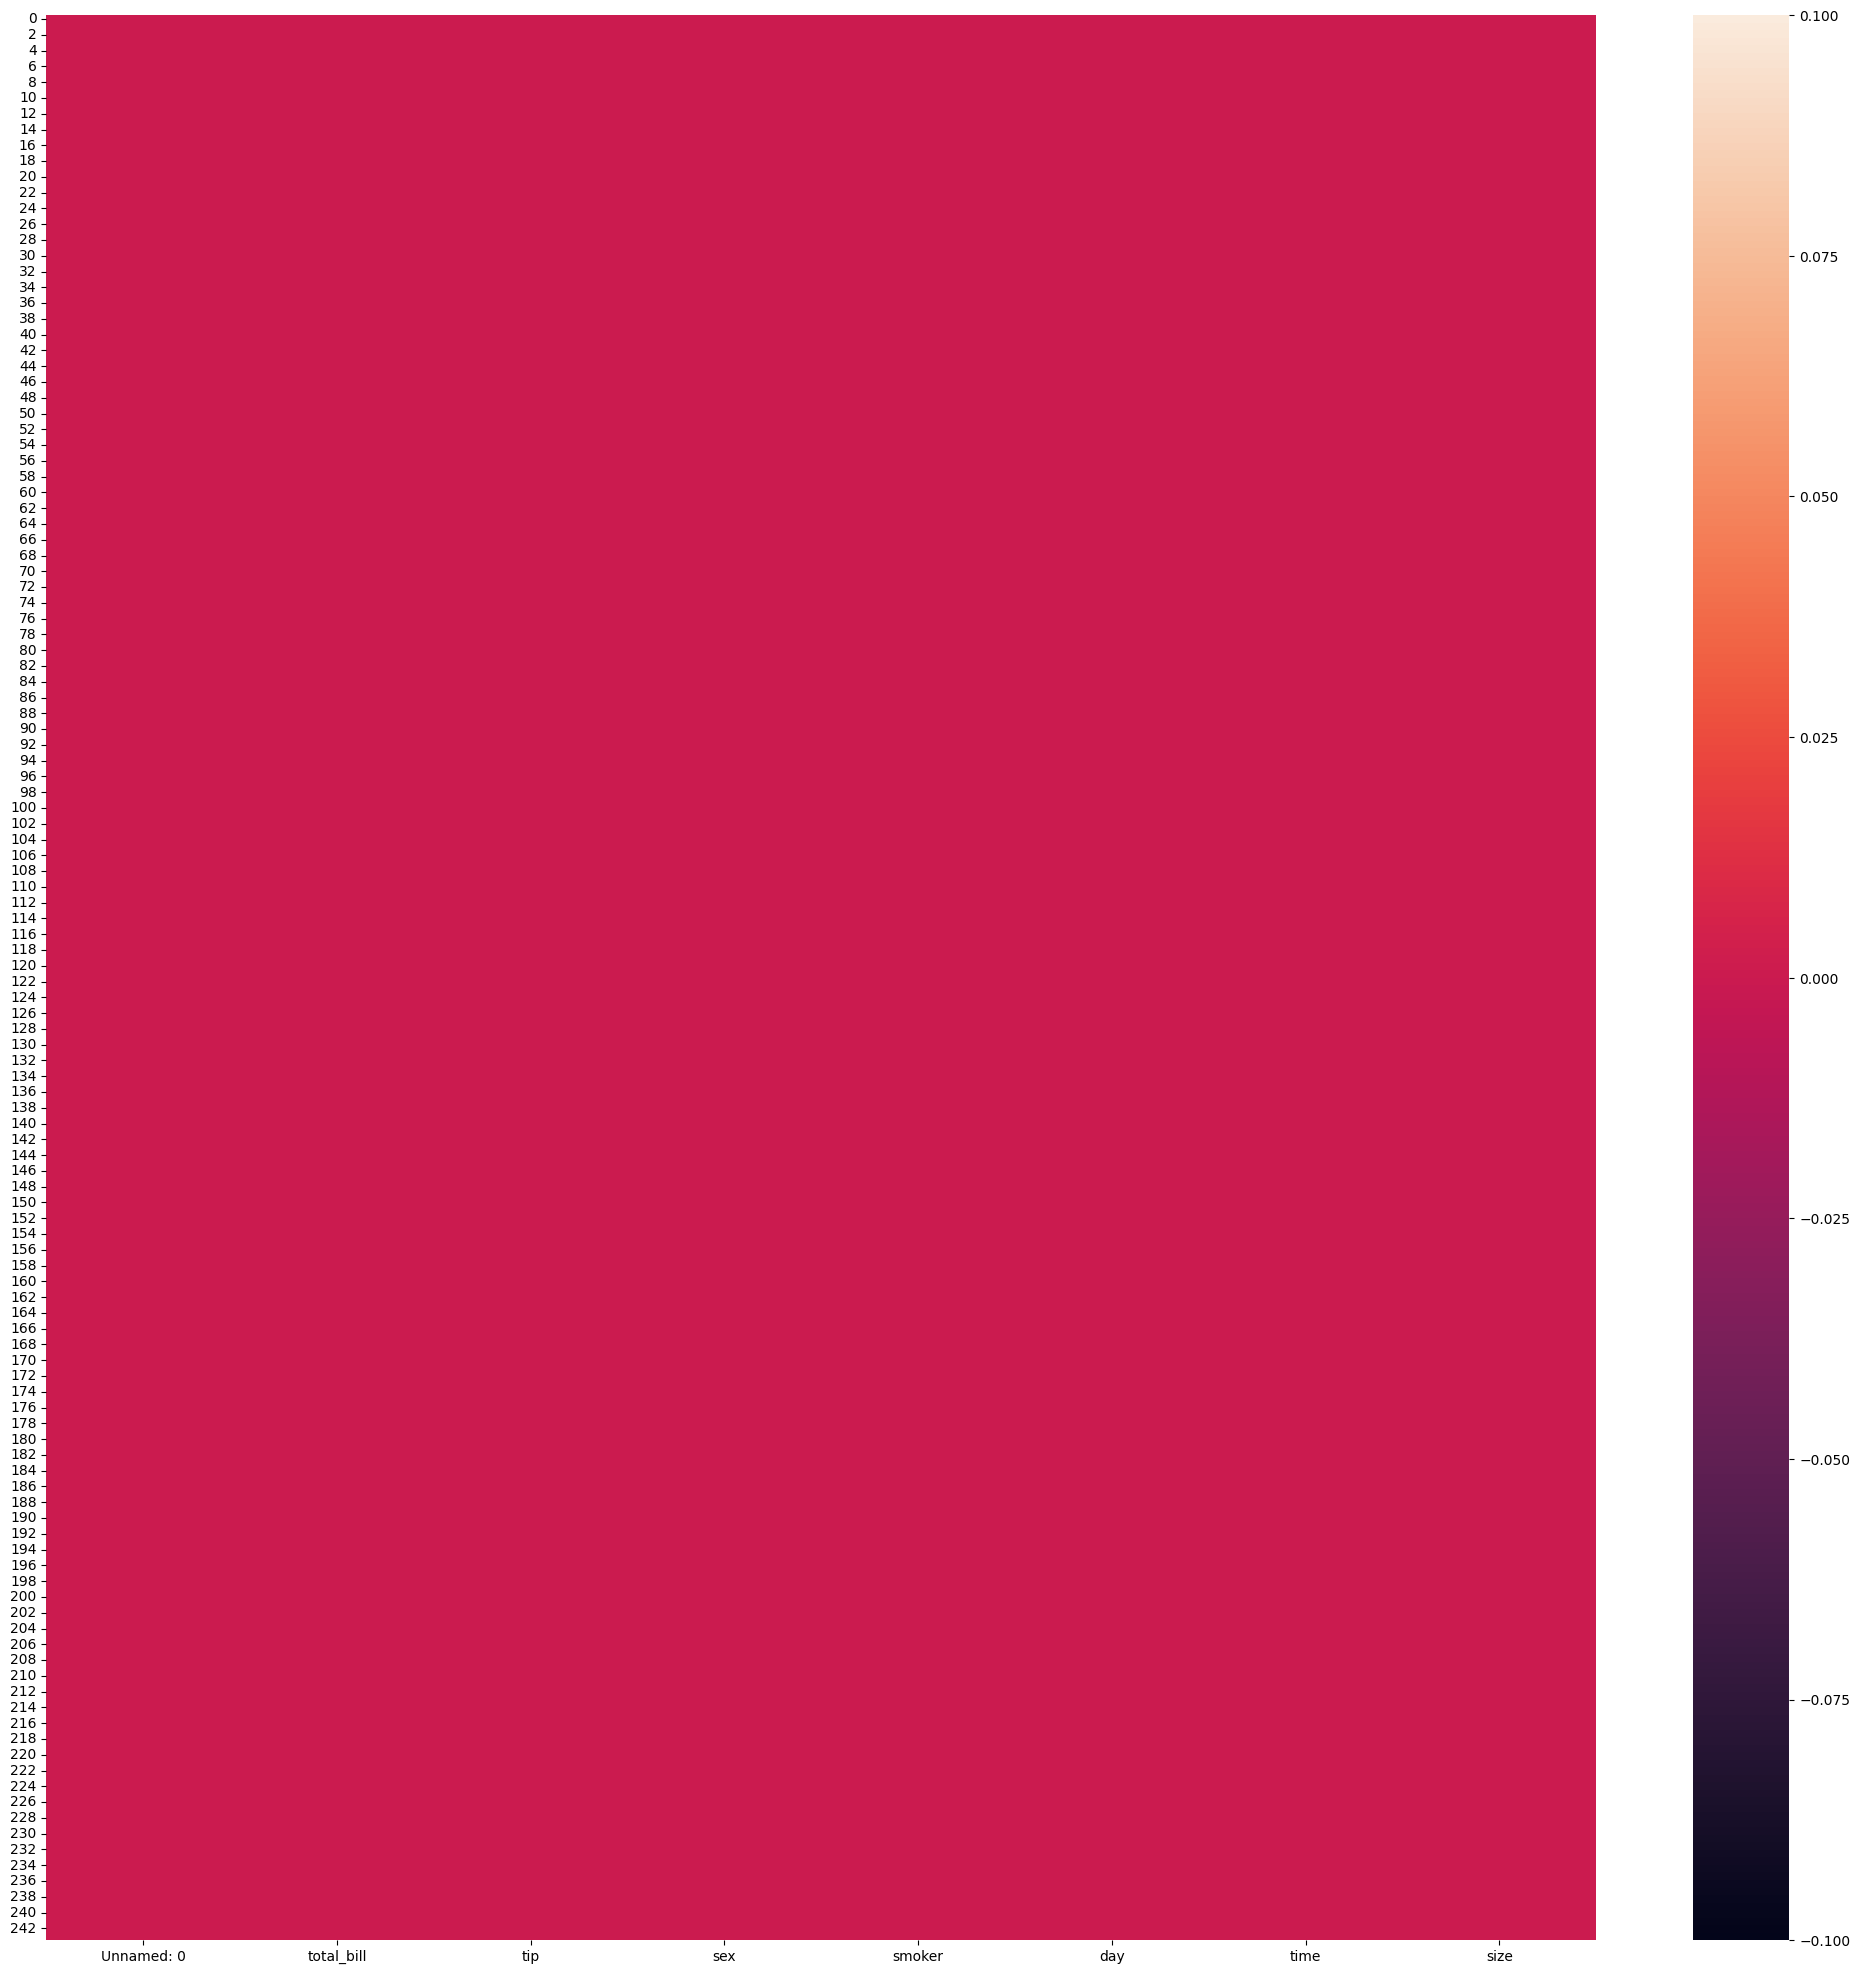

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [13]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var

Unnamed: 0    0.0
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [14]:
drop_columns  = null_var[null_var >17].keys()
drop_columns

Index([], dtype='object')

In [15]:
df2_drop_clm=df.drop(columns=drop_columns)

In [16]:
df2_drop_clm.shape

(244, 8)

<Axes: >

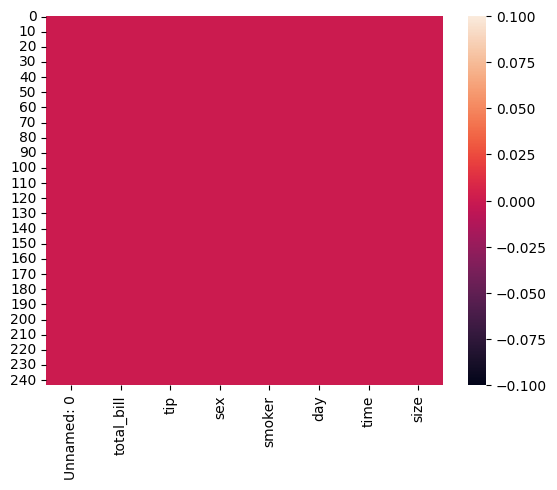

In [17]:
sns.heatmap(df2_drop_clm.isnull())

In [18]:
df3_drop_rows = df2_drop_clm.dropna()

In [19]:
df3_drop_rows.shape

(244, 8)

<Axes: >

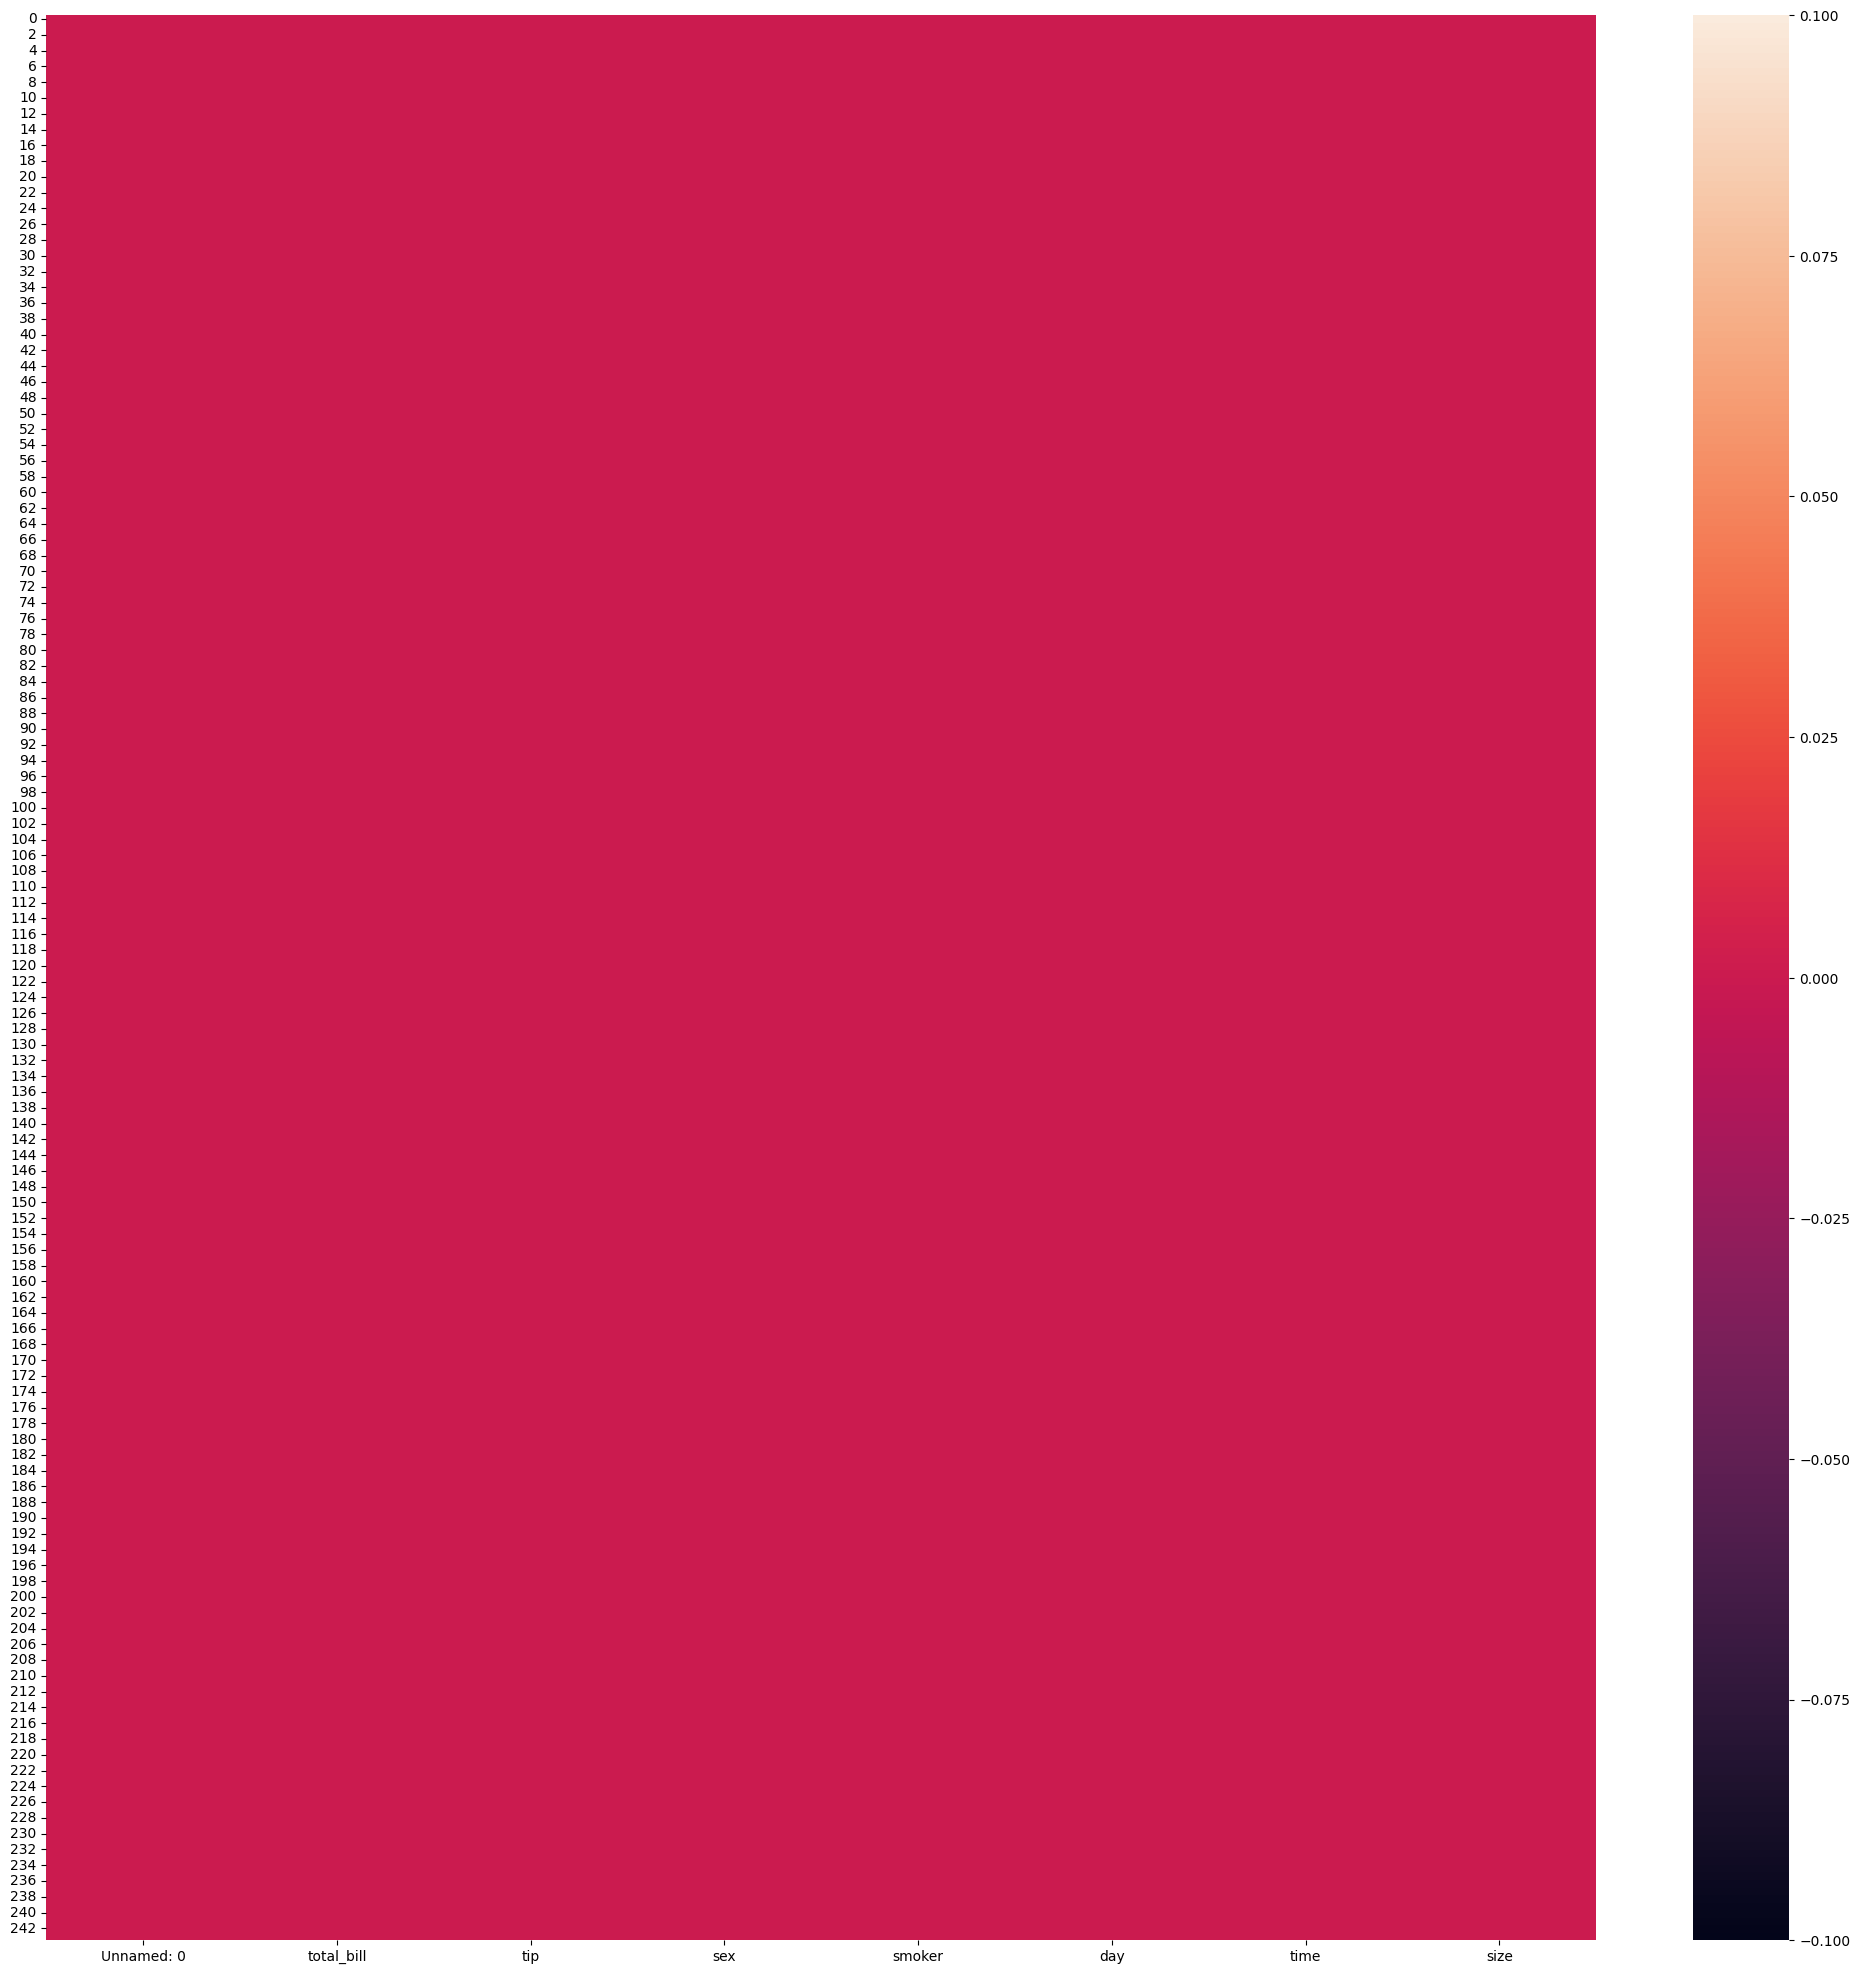

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [21]:
df3_drop_rows.isnull().sum().sum()

0

In [22]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['Unnamed: 0', 'total_bill', 'tip', 'size'], dtype='object')

In [23]:
sns.distplot(df['MSSubClass'])

KeyError: 'MSSubClass'

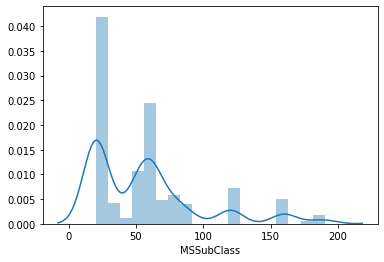

In [34]:
sns.distplot(df3_drop_rows['MSSubClass'])

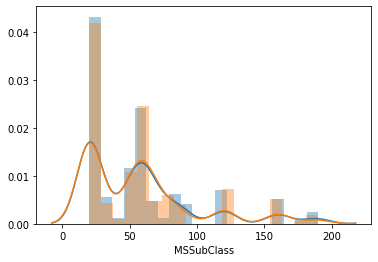

In [35]:
sns.distplot(df['MSSubClass'])
sns.distplot(df3_drop_rows['MSSubClass'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


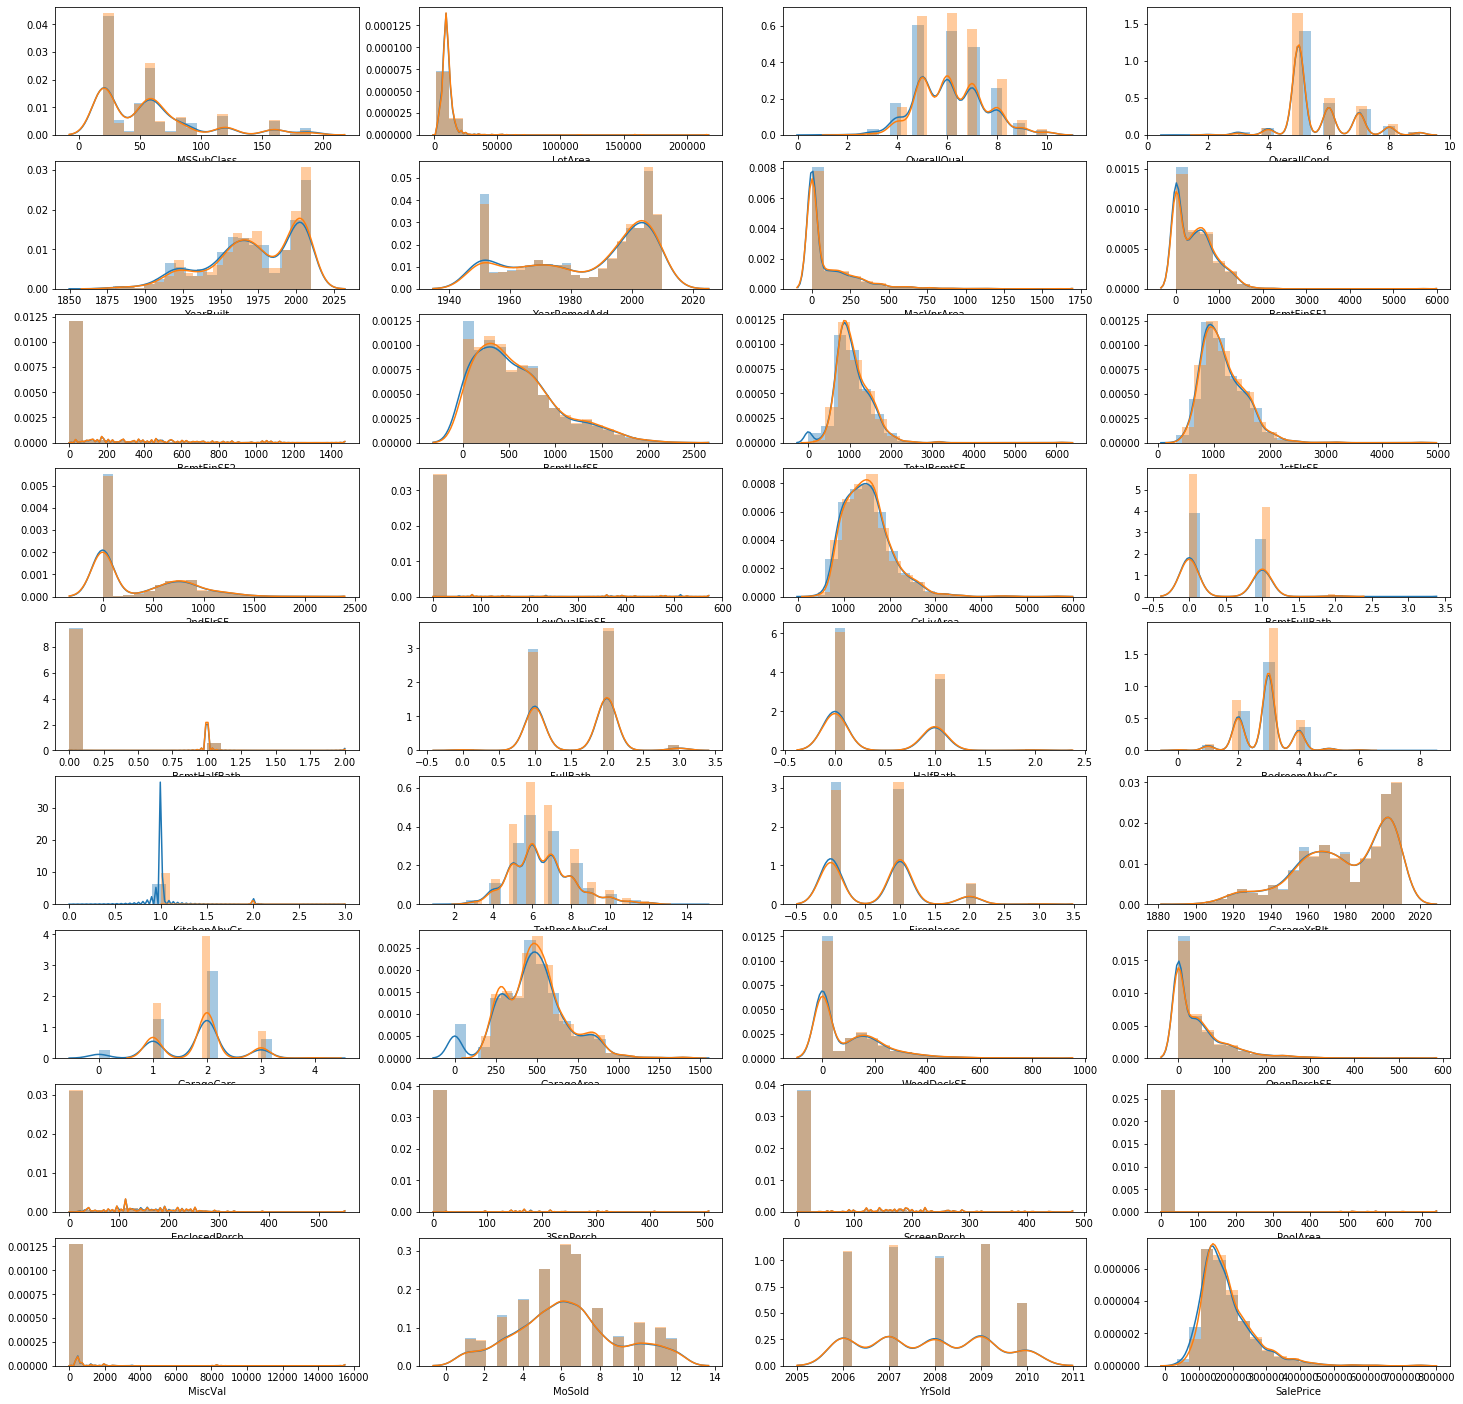

In [42]:
num_var = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

plt.figure(figsize=(25,25))       
for i,var in enumerate(num_var):
    plt.subplot(9,4,i+1)
    sns.distplot(df[var], bins=20)
    sns.distplot(df3_drop_rows[var], bins=20)

In [43]:
df3_drop_rows.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
pd.concat([df['MSZoning'].value_counts()/df.shape[0] * 100, 
          df3_drop_rows['MSZoning'].value_counts()/df3_drop_rows.shape[0] * 100], axis=1,
         keys=['MSZoning_org', 'MSZoning_clean'])

,MSZoning_org,MSZoning_clean
RL,78.835616,79.671151
RM,14.931507,14.275037
FV,4.452055,4.633782
RH,1.095890,0.822123
C (all),0.684932,0.597907


In [50]:
def cat_var_dist(var):
    return pd.concat([df[var].value_counts()/df.shape[0] * 100, 
          df3_drop_rows[var].value_counts()/df3_drop_rows.shape[0] * 100], axis=1,
         keys=[var+'_org', var+'clean'])
    

In [51]:
cat_var_dist('MSZoning')

,MSZoning_org,MSZoningclean
RL,78.835616,79.671151
RM,14.931507,14.275037
FV,4.452055,4.633782
RH,1.095890,0.822123
C (all),0.684932,0.597907


In [1]:
print("Thank You.....-:)")

Thank You.....-:)
